# Twitter text report
## Delaney Curran
### 10/19/2022

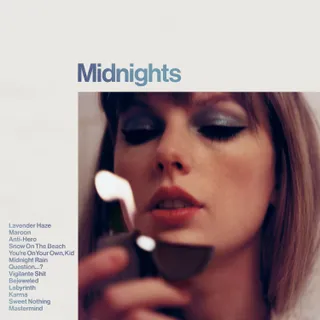

The question I am trying to answer is if there is one song from Taylor Swifts new album that is talked about more then any other. what conversation is souring that song? Is it good or bad?

In [74]:
import pandas as pd
import json
import requests
import urllib

In [75]:
bearer_token = pd.read_csv ("Twitter_token_sept_22.txt", header = 0, sep = '\t')

In [ ]:
bearer_token['Bearer_Token'].iloc[0]

In [77]:
headers = {'Authorization':'Bearer {}'.format(bearer_token['Bearer_Token'].iloc[0])}

In [78]:
endpoint = 'https://api.twitter.com/2/tweets/search/recent'

The query I made is very broad so I would not be biased towards one song. I am talking about the album as a whole. I want to see the whole conversation about the album.

In [79]:
query_param = urllib.parse.quote('("Taylor Swift" OR midnights OR #TSMidnighTS OR #CountdownTo MidnightTS) lang:en')                      

These are the field I am using to gather data from Twitter.

In [80]:
tweet_field = 'lang,public_metrics,author_id,created_at'

In [81]:
user_field = 'username,verified'

In [82]:
expansions = 'entities.mentions.username'

In [83]:
query_param

'%28%22Taylor%20Swift%22%20OR%20midnights%20OR%20%23TSMidnighTS%20OR%20%23CountdownTo%20MidnightTS%29%20lang%3Aen'

In [84]:
tweet_field

'lang,public_metrics,author_id,created_at'

In [85]:
user_field

'username,verified'

In the next line of code I made my max response 100 so that I am about to have 100 tweets every time the query is run. 

In [86]:
search_url = endpoint + '?query={}&tweet.fields={}&user.fields={}&expansions={}&max_results=100'.format(query_param, tweet_field, user_field, expansions)


In [87]:
search_url

'https://api.twitter.com/2/tweets/search/recent?query=%28%22Taylor%20Swift%22%20OR%20midnights%20OR%20%23TSMidnighTS%20OR%20%23CountdownTo%20MidnightTS%29%20lang%3Aen&tweet.fields=lang,public_metrics,author_id,created_at&user.fields=username,verified&expansions=entities.mentions.username&max_results=100'

In [88]:
response = requests.get(search_url, headers = headers)

In [89]:
response

<Response [200]>

This is the first 100 responses that I from my query. Now I need to make this into something that makes sense.

In [ ]:
response.text

I am making sense of the response.text and dividing it into sensible data.

In [91]:
response_dict = json.loads(response.text)

In [92]:
response_dict.keys()

dict_keys(['data', 'includes', 'errors', 'meta'])

In [93]:
type(response_dict['data'])

list

In [94]:
type(response_dict['data'][0])

dict

In [ ]:
response_dict['data']

This next chunk of code is used for separating the 'data' into a table.

In [96]:
response_dict['data'][0].keys()

dict_keys(['entities', 'author_id', 'text', 'id', 'public_metrics', 'created_at', 'edit_history_tweet_ids', 'lang'])

In [97]:
response_dict['data'][0]['text']

'RT @taylorr_media: Taylor Swift - Maroon https://t.co/BQc86vHd2Y'

In [98]:
response_dict['data'][4]['id']

'1584963012389376000'

In [99]:
response_dict['data'][0]['public_metrics'].keys()

dict_keys(['retweet_count', 'reply_count', 'like_count', 'quote_count'])

In [100]:
response_df = pd.DataFrame(response_dict['data'])
response_df2 = response_df

In [101]:
response_df.head()

,entities,author_id,text,id,public_metrics,created_at,edit_history_tweet_ids,lang
0,"{'mentions': [{'start': 3, 'end': 17, 'usernam...",280135897,RT @taylorr_media: Taylor Swift - Maroon https...,1584963020244992000,"{'retweet_count': 1595, 'reply_count': 0, 'lik...",2022-10-25T17:40:05.000Z,[1584963020244992000],en
1,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",1322798064327823360,RT @TChartSwift: “Midnights” has reached 110 #...,1584963018299150338,"{'retweet_count': 358, 'reply_count': 0, 'like...",2022-10-25T17:40:05.000Z,[1584963018299150338],en
2,NaN,570222924,I really want to buy the midnights vinyl due t...,1584963017191862272,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2022-10-25T17:40:05.000Z,[1584963017191862272],en
3,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",2688702500,RT @TheWrap: The hosts of #TheView will not st...,1584963015774208007,"{'retweet_count': 50, 'reply_count': 0, 'like_...",2022-10-25T17:40:04.000Z,[1584963015774208007],en
4,"{'mentions': [{'start': 3, 'end': 16, 'usernam...",1456423934103019522,RT @cham_swiftie: 💎GIVEAWAY💎I’m giving away on...,1584963012389376000,"{'retweet_count': 393, 'reply_count': 0, 'like...",2022-10-25T17:40:03.000Z,[1584963012389376000],en


This code is for separating the public metrics into a table.

In [102]:
public_metrics_df = pd.DataFrame(list(response_df['public_metrics']))

In [103]:
public_metrics_df

,retweet_count,reply_count,like_count,quote_count
0,1595,0,0,0
1,358,0,0,0
2,0,0,0,0
3,50,0,0,0
4,393,0,0,0
...,...,...,...,...
94,52663,0,0,0
95,50,0,0,0
96,2,0,0,0
97,186,0,0,0


In [104]:
response_df['retweets'] = public_metrics_df['retweet_count']
response_df['replies'] = public_metrics_df['reply_count']
response_df['likes'] = public_metrics_df['like_count']
response_df['quotes'] = public_metrics_df['quote_count']

In [105]:
response_df.head()

,entities,author_id,text,id,public_metrics,created_at,edit_history_tweet_ids,lang,retweets,replies,likes,quotes
0,"{'mentions': [{'start': 3, 'end': 17, 'usernam...",280135897,RT @taylorr_media: Taylor Swift - Maroon https...,1584963020244992000,"{'retweet_count': 1595, 'reply_count': 0, 'lik...",2022-10-25T17:40:05.000Z,[1584963020244992000],en,1595,0,0,0
1,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",1322798064327823360,RT @TChartSwift: “Midnights” has reached 110 #...,1584963018299150338,"{'retweet_count': 358, 'reply_count': 0, 'like...",2022-10-25T17:40:05.000Z,[1584963018299150338],en,358,0,0,0
2,NaN,570222924,I really want to buy the midnights vinyl due t...,1584963017191862272,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2022-10-25T17:40:05.000Z,[1584963017191862272],en,0,0,0,0
3,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",2688702500,RT @TheWrap: The hosts of #TheView will not st...,1584963015774208007,"{'retweet_count': 50, 'reply_count': 0, 'like_...",2022-10-25T17:40:04.000Z,[1584963015774208007],en,50,0,0,0
4,"{'mentions': [{'start': 3, 'end': 16, 'usernam...",1456423934103019522,RT @cham_swiftie: 💎GIVEAWAY💎I’m giving away on...,1584963012389376000,"{'retweet_count': 393, 'reply_count': 0, 'like...",2022-10-25T17:40:03.000Z,[1584963012389376000],en,393,0,0,0


In [106]:
response_df2 = response_df2.join(public_metrics_df)

In [107]:
response_df2.head()

,entities,author_id,text,id,public_metrics,created_at,edit_history_tweet_ids,lang,retweets,replies,likes,quotes,retweet_count,reply_count,like_count,quote_count
0,"{'mentions': [{'start': 3, 'end': 17, 'usernam...",280135897,RT @taylorr_media: Taylor Swift - Maroon https...,1584963020244992000,"{'retweet_count': 1595, 'reply_count': 0, 'lik...",2022-10-25T17:40:05.000Z,[1584963020244992000],en,1595,0,0,0,1595,0,0,0
1,"{'mentions': [{'start': 3, 'end': 15, 'usernam...",1322798064327823360,RT @TChartSwift: “Midnights” has reached 110 #...,1584963018299150338,"{'retweet_count': 358, 'reply_count': 0, 'like...",2022-10-25T17:40:05.000Z,[1584963018299150338],en,358,0,0,0,358,0,0,0
2,NaN,570222924,I really want to buy the midnights vinyl due t...,1584963017191862272,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2022-10-25T17:40:05.000Z,[1584963017191862272],en,0,0,0,0,0,0,0,0
3,"{'mentions': [{'start': 3, 'end': 11, 'usernam...",2688702500,RT @TheWrap: The hosts of #TheView will not st...,1584963015774208007,"{'retweet_count': 50, 'reply_count': 0, 'like_...",2022-10-25T17:40:04.000Z,[1584963015774208007],en,50,0,0,0,50,0,0,0
4,"{'mentions': [{'start': 3, 'end': 16, 'usernam...",1456423934103019522,RT @cham_swiftie: 💎GIVEAWAY💎I’m giving away on...,1584963012389376000,"{'retweet_count': 393, 'reply_count': 0, 'like...",2022-10-25T17:40:03.000Z,[1584963012389376000],en,393,0,0,0,393,0,0,0


This is used for getting the username out of the entities.

In [108]:
type(response_dict['data'])

list

In [109]:
type(response_dict['data'][0]['entities'])

dict

In [110]:
response_dict['data'][0]['entities']['mentions']

[{'start': 3,
  'end': 17,
  'username': 'taylorr_media',
  'id': '1409776370608074752'}]

In [ ]:
response_dict['data']

In [112]:
entities_df = pd.DataFrame(list(response_dict['data'][0]['entities']['mentions']))

In [114]:
mentions = [x['entities']['mentions'] for x in response_dict['data'][0:2]]

In [115]:
entities_df

,start,end,username,id
0,3,17,taylorr_media,1409776370608074752


Like we talked about in class, this was all I was able to extract with my current coding knowledge.

This is used for getting the next 100 tweets. 

In [116]:
response_dict['meta']['next_token']

'b26v89c19zqg8o3fpzel4w69ehyjpb6hpef4xypcxyq2l'

In [117]:
next_search_url = search_url + "&next_token={}".format(response_dict['meta']['next_token'])

In [118]:
next_response = requests.get(next_search_url, headers = headers)

In [119]:
next_response.status_code

200

In [ ]:
next_response.text

In [121]:
next_response_dict =json.loads(next_response.text)

In [122]:
next_response_dict['meta']

{'newest_id': '1584962906588065793',
 'oldest_id': '1584962810932789248',
 'result_count': 100,
 'next_token': 'b26v89c19zqg8o3fpzel4w69ehqw86emxug04004cpful'}

Honestly in not Totally sure what this is used for. I think it is how we get the next 100 tweets but I'm not completely sure.

In [123]:
def twt_recent_search (query, num_pages, header):
    response_list = []
    next_token = ''
    for i in range(0, num_pages):
        if i > 0:
            this_query = query + "&next_token={}".format(next_token)
        else:
            this_query = query
        
        this_response = requests.get(this_query, headers= header)
        print(this_response.status_code)
        this_response_dict = json.loads(this_response.text)
        response_list.append(this_response_dict)
        next_token = this_response_dict['meta']['next_token']
        
    return response_list

In [124]:
response_list = twt_recent_search(search_url, 4, headers)

200
200
200
200


This is the table for the next 100 tweets.

In [125]:
results_1 = pd.DataFrame.from_records(response_list)

In [126]:
data_list = list(results_1['data'])

In [127]:
data_list_of_dfs = [pd.DataFrame(x) for x in data_list]

In [128]:
data_df = pd.concat(data_list_of_dfs)

In [129]:
data_df.head()

,text,created_at,edit_history_tweet_ids,entities,id,public_metrics,lang,author_id
0,RT @chartdata: Taylor Swift could become the f...,2022-10-25T17:40:40.000Z,[1584963164835172353],"{'mentions': [{'start': 3, 'end': 13, 'usernam...",1584963164835172353,"{'retweet_count': 693, 'reply_count': 0, 'like...",en,1584461529621086208
1,RT @taypinkloml: #BLACKPINK as midnights track...,2022-10-25T17:40:39.000Z,[1584963163061030915],"{'mentions': [{'start': 3, 'end': 15, 'usernam...",1584963163061030915,"{'retweet_count': 34, 'reply_count': 0, 'like_...",en,1552063285687631872
2,RT @chartdata: Taylor Swift could become the f...,2022-10-25T17:40:39.000Z,[1584963162465792000],"{'mentions': [{'start': 3, 'end': 13, 'usernam...",1584963162465792000,"{'retweet_count': 693, 'reply_count': 0, 'like...",en,1214505904206336002
3,RT @contrarianshit: Y'ALL so I put ‘anti-hero’...,2022-10-25T17:40:39.000Z,[1584963161698209792],"{'mentions': [{'start': 3, 'end': 18, 'usernam...",1584963161698209792,"{'retweet_count': 3857, 'reply_count': 0, 'lik...",en,434586623
4,RT @TheWrap: The hosts of #TheView will not st...,2022-10-25T17:40:39.000Z,[1584963161043918848],"{'mentions': [{'start': 3, 'end': 11, 'usernam...",1584963161043918848,"{'retweet_count': 56, 'reply_count': 0, 'like_...",en,848216684141977602


The most helpful information for my query would be the text itself. I will need to do an analysis on the text to see what is the conversation regarding the song titles. 

This is the total number of tweets I have gathered.

In [130]:
len(data_df.index)

399

This is how I exported my data to a csv file.

In [131]:
data_df.to_csv('twitter_text_report.csv')

I know that the data I have gathered has some weakness and limitations. First, I was not able to get all the usernames out of my data because of my lack of coding knowledge. This field would be useful to me because I believe a lot of tweets are from Taylor Swift 'stan' accounts or from 'swifties'. Once I have more coding knowledge I will be able see if that is actually true. Another weakness is that I do not yet have the knowledge to know exactly what to do with the data I have gathered. I could not have all the right information once I actually start doing my analysis. 

My next step would be to do the text analysis. I would be able to look at the data I have gathered and see what songs are being talked about the most.Are they being talked about more because people like them or dislike them? what is the actually conversation about the songs? 

One alternative approve I can think of is to pick some songs and run a query with the titles in it. That ways I will be able to have a smaller set of data to work with instead of every song on the album.